In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile

In [ ]:
dataset_path="/content/gdrive/My Drive/534640_1132850_bundle_archive.zip"
zfile=zipfile.ZipFile(dataset_path)
zfile.extractall()

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import shutil
import os
import cv2

Using TensorFlow backend.


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
train_path = 'train'       
test_path = 'test'           
validate_path = 'valid'    


In [ ]:
#Creating generator for Training DataSet
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1, 
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(
        'valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [ ]:
#instantiate a base model with pre-trained weigts.
base_model=keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

In [ ]:
#freeze the base model
base_model.trainable = False

In [ ]:
#Create new model on top
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(200,activation='softmax',kernel_initializer='glorot_normal'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)              

In [ ]:
#Train the model on new data.
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=50,validation_data=val_generator,workers=10,use_multiprocessing=True)

Epoch 1/50
430/430 [==============================] - 371s 864ms/step - loss: 9.2593 - accuracy: 0.0806 - val_loss: 2.3112 - val_accuracy: 0.3190
Epoch 2/50
430/430 [==============================] - 348s 810ms/step - loss: 3.6748 - accuracy: 0.2888 - val_loss: 1.5526 - val_accuracy: 0.6280
Epoch 3/50
430/430 [==============================] - 347s 806ms/step - loss: 2.5582 - accuracy: 0.4876 - val_loss: 0.1373 - val_accuracy: 0.7490
Epoch 4/50
430/430 [==============================] - 348s 808ms/step - loss: 1.9534 - accuracy: 0.5980 - val_loss: 0.2313 - val_accuracy: 0.8340
Epoch 5/50
430/430 [==============================] - 349s 811ms/step - loss: 1.5940 - accuracy: 0.6701 - val_loss: 0.0170 - val_accuracy: 0.8420
Epoch 6/50
430/430 [==============================] - 351s 816ms/step - loss: 1.3953 - accuracy: 0.7134 - val_loss: 1.2865 - val_accuracy: 0.8680
Epoch 7/50
430/430 [==============================] - 350s 815ms/step - loss: 1.2218 - accuracy: 0.7492 - val_loss: 0.0305 -

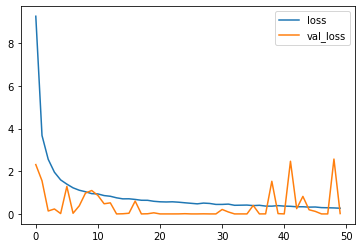

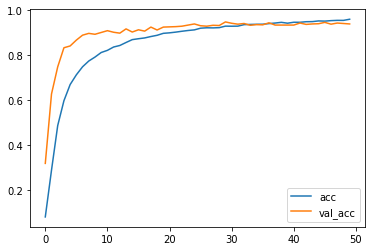

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 10s 319ms/step


[0.0, 0.9620000123977661]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_generator.reset()

In [ ]:
pred=model.predict_generator(test_generator,verbose=1)

32/32 [==============================] - 10s 300ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
print(labels)

{0: 'AFRICAN FIREFINCH', 1: 'ALBATROSS', 2: 'ALEXANDRINE PARAKEET', 3: 'AMERICAN AVOCET', 4: 'AMERICAN BITTERN', 5: 'AMERICAN COOT', 6: 'AMERICAN GOLDFINCH', 7: 'AMERICAN KESTREL', 8: 'AMERICAN PIPIT', 9: 'AMERICAN REDSTART', 10: 'ANHINGA', 11: 'ANNAS HUMMINGBIRD', 12: 'ANTBIRD', 13: 'ARARIPE MANAKIN', 14: 'BALD EAGLE', 15: 'BALTIMORE ORIOLE', 16: 'BANANAQUIT', 17: 'BAR-TAILED GODWIT', 18: 'BARN OWL', 19: 'BARN SWALLOW', 20: 'BAY-BREASTED WARBLER', 21: 'BEARDED BARBET', 22: 'BELTED KINGFISHER', 23: 'BIRD OF PARADISE', 24: 'BLACK FRANCOLIN', 25: 'BLACK SKIMMER', 26: 'BLACK SWAN', 27: 'BLACK THROATED WARBLER', 28: 'BLACK VULTURE', 29: 'BLACK-CAPPED CHICKADEE', 30: 'BLACK-NECKED GREBE', 31: 'BLACK-THROATED SPARROW', 32: 'BLACKBURNIAM WARBLER', 33: 'BLUE GROUSE', 34: 'BLUE HERON', 35: 'BOBOLINK', 36: 'BROWN NOODY', 37: 'BROWN THRASHER', 38: 'CACTUS WREN', 39: 'CALIFORNIA CONDOR', 40: 'CALIFORNIA GULL', 41: 'CALIFORNIA QUAIL', 42: 'CANARY', 43: 'CAPE MAY WARBLER', 44: 'CAPUCHINBIRD', 45: 'C

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


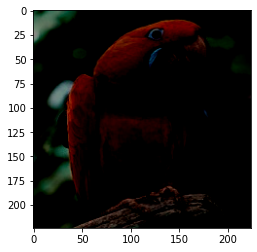

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is HYACINTH MACAW
Model predicted is HYACINTH MACAW


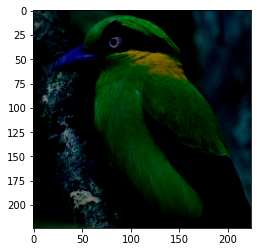

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is JAVAN MAGPIE
Model predicted is JAVAN MAGPIE


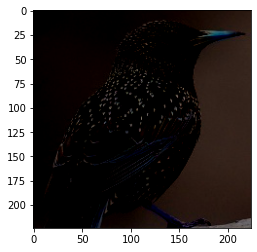

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is COMMON STARLING
Model predicted is COMMON STARLING


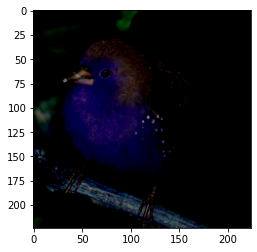

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is AFRICAN FIREFINCH
Model predicted is AFRICAN FIREFINCH


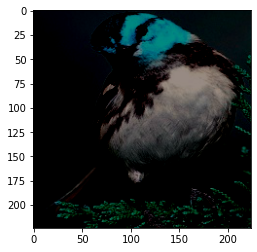

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is GOLDEN CHEEKED WARBLER
Model predicted is GOLDEN CHEEKED WARBLER


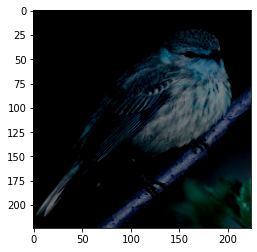

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is CAPE MAY WARBLER
Model predicted is CAPE MAY WARBLER


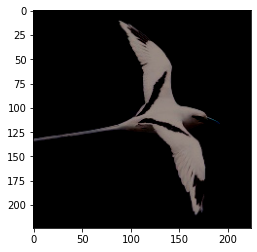

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is WHITE TAILED TROPIC
Model predicted is WHITE TAILED TROPIC


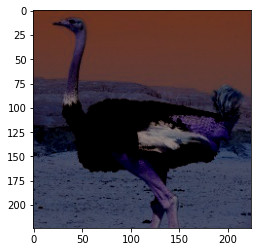

Test Label is OSTRICH
Model predicted is OSTRICH


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


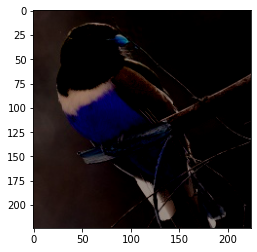

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is ELEGANT TROGON
Model predicted is ELEGANT TROGON


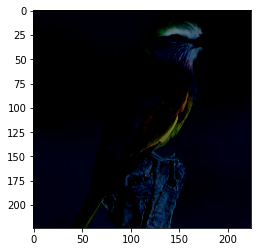

Test Label is LILAC ROLLER
Model predicted is LILAC ROLLER


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


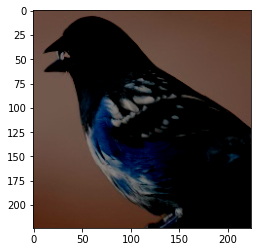

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is EASTERN TOWEE
Model predicted is EASTERN TOWEE


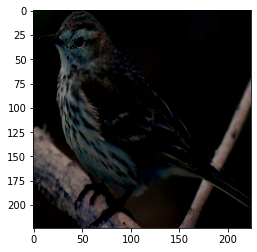

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is AMERICAN PIPIT
Model predicted is AMERICAN PIPIT


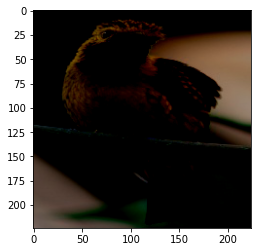

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is SPANGLED COTINGA
Model predicted is SPANGLED COTINGA


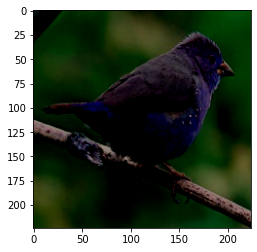

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is AFRICAN FIREFINCH
Model predicted is AFRICAN FIREFINCH


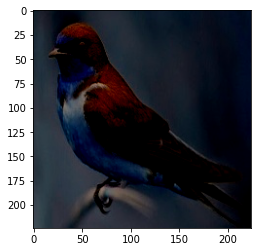

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is BARN SWALLOW
Model predicted is BARN SWALLOW


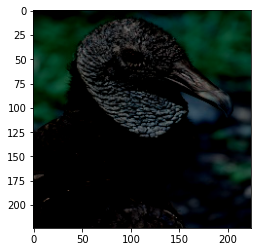

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is BLACK VULTURE
Model predicted is BLACK VULTURE


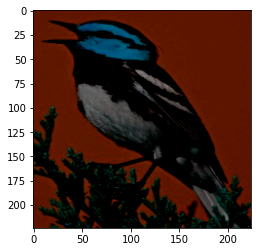

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is GOLDEN CHEEKED WARBLER
Model predicted is GOLDEN CHEEKED WARBLER


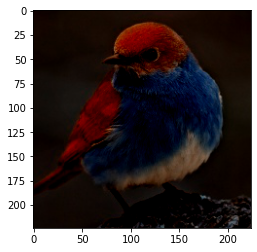

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is EASTERN BLUEBIRD
Model predicted is EASTERN BLUEBIRD


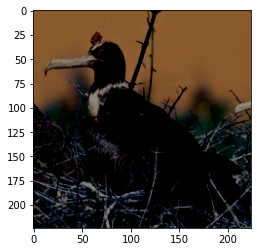

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is FRIGATE
Model predicted is OSPREY


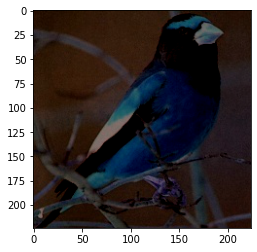

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is EVENING GROSBEAK
Model predicted is EVENING GROSBEAK


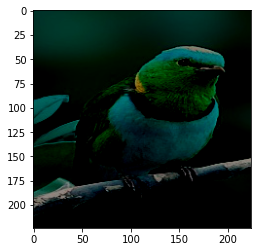

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is GOLDEN CHLOROPHONIA
Model predicted is GOLDEN CHLOROPHONIA


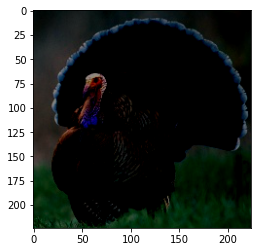

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is WILD TURKEY
Model predicted is WILD TURKEY


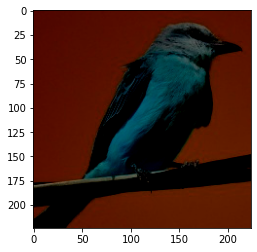

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is COUCHS KINGBIRD
Model predicted is COUCHS KINGBIRD


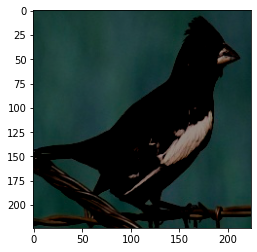

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is LARK BUNTING
Model predicted is LARK BUNTING


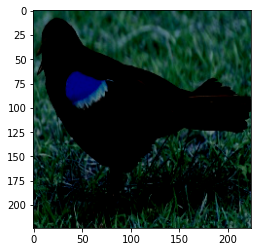

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is RED WINGED BLACKBIRD
Model predicted is RED WINGED BLACKBIRD


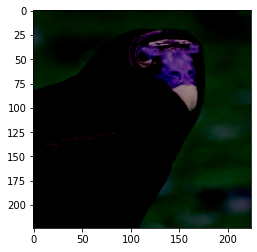

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is TURKEY VULTURE
Model predicted is TURKEY VULTURE


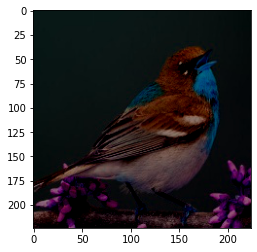

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is NORTHERN PARULA
Model predicted is NORTHERN PARULA


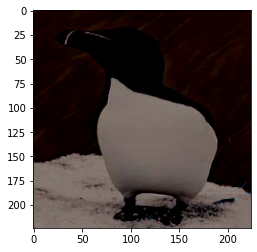

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is RAZORBILL
Model predicted is RAZORBILL


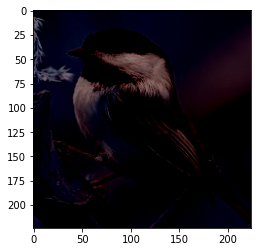

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is BLACK-CAPPED CHICKADEE
Model predicted is BLACK-CAPPED CHICKADEE


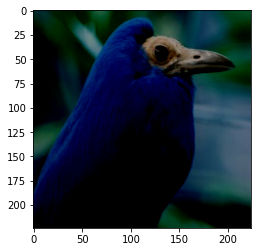

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is CAPUCHINBIRD
Model predicted is CAPUCHINBIRD


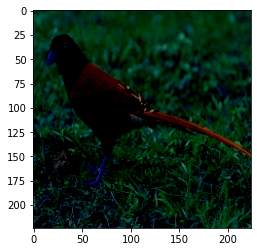

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Label is TAIWAN MAGPIE
Model predicted is TAIWAN MAGPIE


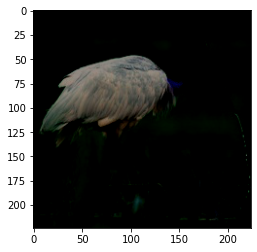

Test Label is JABIRU
Model predicted is JABIRU


In [ ]:
x,y = test_generator.next()
label = np.argmax(y,axis=1)
predictedvalues = model.predict(x)
bb = np.argmax(predictedvalues,axis=1)
b = np.argmax(y,axis=1)
m = []
for i in range(32):
    image = x[i]
    plt.imshow(image/255)
    plt.show()
    print("Test Label is",labels[b[i]])
    print("Model predicted is",labels[bb[i]])
    if b[i]!=bb[i]:
      m.append(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


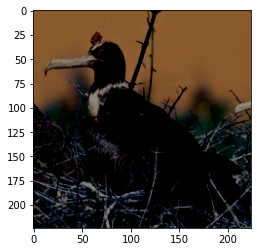

Test Label is FRIGATE
Model predicted is OSPREY
It is a mismatch


In [ ]:
if len(m) != 0:
  for i in m:
      image = x[i]
      plt.imshow(image/255)
      plt.show()
      print("Test Label is",labels[b[i]])
      print("Model predicted is",labels[bb[i]])
      print("It is a mismatch")